/Users/agnieszka/Documents/STUDIA/SEMESTR 6/IwM/Projekt1/Informatyka-w-Medycynie-Tomograf/plikKrzysia.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pixel.raw += float(picture[pos[0], pos[1]])


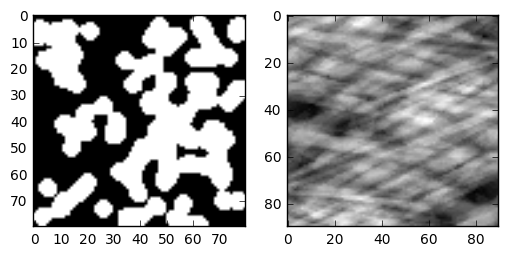

Oryginalny obraz:
(80, 80)
Stenogram:
(90, 90)
Chce pofiltrować
SINGORAM:
FILTERED SINOGRAM:


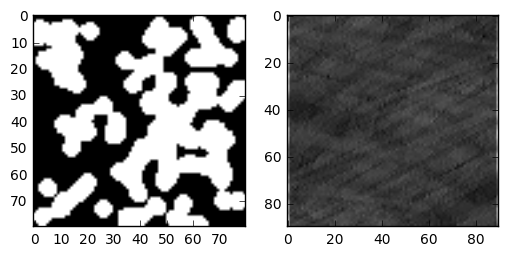

Powinnam już skończyć filtrować


/Users/agnieszka/Documents/STUDIA/SEMESTR 6/IwM/Projekt1/Informatyka-w-Medycynie-Tomograf/plikAgi.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  reconstructed[x][y] += value
/Users/agnieszka/Documents/STUDIA/SEMESTR 6/IwM/Projekt1/Informatyka-w-Medycynie-Tomograf/plikAgi.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  helper[x][y] += 1


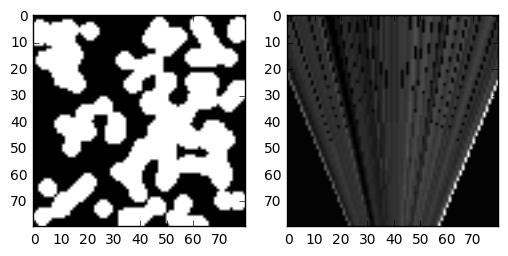

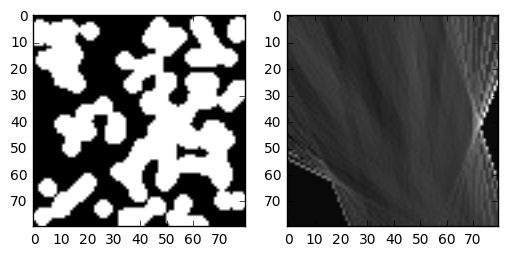

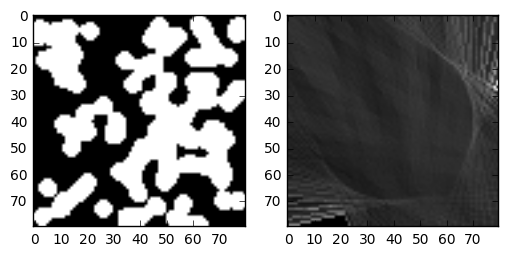

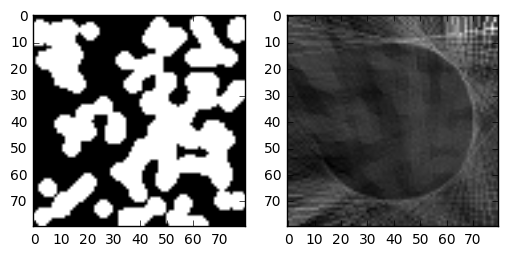

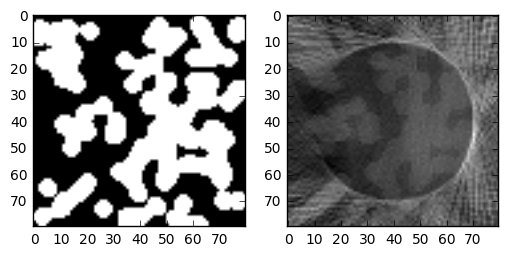

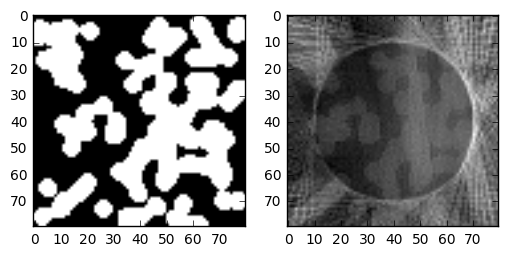

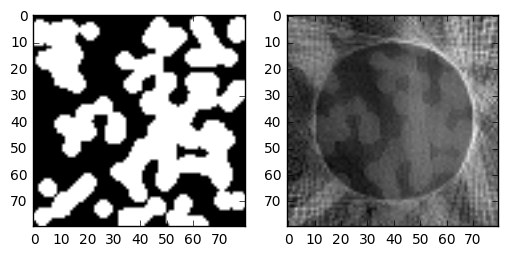

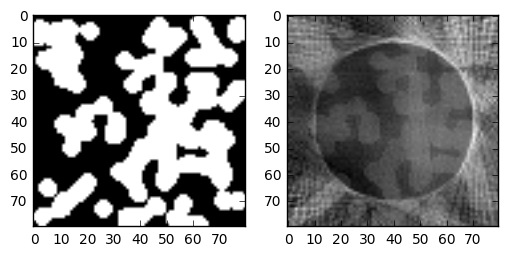

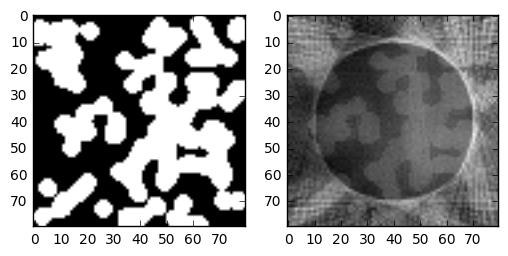

lol


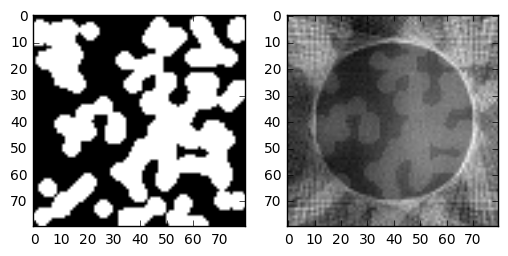

In [1]:
#!/usr/bin/python
import sys
import plikKrzysia
import plikAgi
import numpy as np
from matplotlib import pyplot as plt
from skimage import data


class Result:
    def __init__(self, picture=[]):
        self.raw = picture
        self.improved = picture


class Picture_struct:
    'Structure of our picture'
    oryginal = []
    sinogram = []
    filtered = []
    reconstructed = []
    result = Result()

    def __init__(self, picture_):
        self.oryginal = picture_

    def picture2sinogram(self):
        # Should return array [n][n] which is result of the function  .. from  plikKrzysia
        # lines n x n x 4 array of lines
        self.sinogram, self.lines = plikKrzysia.picture2sinogram(self.oryginal, width=90, detector_amount=90, alpha=4)
        fig, plots = plt.subplots(1, 2)
        plots[0].imshow(self.oryginal, cmap='gray')
        plots[1].imshow(self.sinogram, cmap='gray')
        plt.show()
        print("Oryginalny obraz:")
        print(np.shape(self.oryginal))
        print("Stenogram:")
        print(np.shape(self.sinogram))

        return self.sinogram

    def sinogram2picture(self):
        self.reconstructed = plikAgi.sinogram2picture(self.oryginal, self.sinogram, self.lines)
        fig, plots = plt.subplots(1, 2)
        plots[0].imshow(self.oryginal, cmap='gray')
        plots[1].imshow(self.reconstructed, cmap='gray')
        plt.show()
        #self.result.raw = plikAgi.sinogram2picture(self.sinogram)
        #self.result.improved = plikAgi.sinogram2picture(self.filtered)
        return self.result

    def filtering(self):
        #self.filtered = plikAgi.filtered(self.sinogram)
        return self.filtered


def tomograf(picture_):
    picture = Picture_struct(picture_)
    picture.picture2sinogram()
    #TODO
    #    picture.filtered()
    picture.sinogram2picture()
    return picture


if __name__ == "__main__":
    # if (len(sys.argv) != 2):
    #    print("This program requires a bitmap picture as an argument")
    # tomograf(sys.argv[1])

    #example1
    picture = data.binary_blobs(length=80, blob_size_fraction=0.1, n_dim=2, volume_fraction=0.5, seed=None)

    #Example2
    #picture = data.moon()
    tomograf(picture)